In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import os
import matplotlib.pyplot as plt
from configs.RecursiveVPSDE.Markovian_fBiPotDDims.recursive_Markovian_PostMeanScore_fBiPot8Dims_T256_H05_tl_110data_StbleTgt_FULLDATA_LOWNOISE import get_config

In [2]:
config = get_config()
num_paths = 1024 if config.feat_thresh == 1. else 10240
assert num_paths == 10240
root_dir = "/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"

In [3]:
import pandas as pd
def get_drift_files_nonfull(config, root_dir ):
    ts_type = f"{config.ndims}DDims"
    include = (f"_{num_paths}NPaths_{config.t0}t0_{config.deltaT:.3e}dT_").replace(".", "")
    root_nadaraya_dir = root_dir + f"ExperimentResults/Nadaraya/8DDimsLowNoise/"
    true_files = []
    local_files = []
    mses = []
    for file in os.listdir(root_nadaraya_dir):
        if "IIDNadaraya" in file and ts_type in file and include in file:
            if "true" in file:
                true_files.append(root_nadaraya_dir+file)
            elif "global" in file:
                local_files.append(root_nadaraya_dir+file)
            elif "bwidx" in file:
                mses_full = pd.read_parquet(root_nadaraya_dir+file)
                print(mses_full)
                mses.append(mses_full)
    mses = pd.concat(mses).sort_values("bw", axis=0)
    assert len(true_files)>0, "No true files found"
    assert len(local_files)>0, "No local files found"
    assert (len(true_files) == len(local_files))
    def extract_bw_number(s):
        match = s.split("/")[-1].split("_")[4][:-2]
        return float("0." + match)
    true_files = sorted(true_files, key=extract_bw_number)
    local_files = sorted(local_files, key=extract_bw_number)
    bws = [extract_bw_number(f) for f in true_files]
    return true_files, local_files, bws, mses

         bw        mse
4  0.000857  23.988707
           bw       mse
41  15.848932  0.583164
         bw       mse
28  0.67501  0.428835
            bw       mse
52  398.107171  0.584836
          bw       mse
25  0.293252  0.665502
          bw       mse
19  0.055348  1.696313
          bw       mse
26  0.387196  0.558048
          bw       mse
32  1.840772  0.501823
          bw       mse
29  0.891251  0.429151
      bw       mse
39  10.0  0.580672
          bw      mse
20  0.073079  1.31126
         bw        mse
7  0.001972  21.915579
          bw        mse
13  0.010446  11.312179
          bw       mse
14  0.013793  9.122377
           bw      mse
46  50.118723  0.58467
         bw        mse
6  0.001493  22.847322
          bw       mse
27  0.511235  0.471308
          bw       mse
15  0.018211  7.019321
          bw       mse
22  0.127401  1.007148
           bw       mse
44  31.622777  0.584416
          bw       mse
35  3.801894  0.558525
          bw       mse
34  2.985383 

Text(0.5, 1.0, 'Minimum MSE is (0.4288353296608331, 28)')

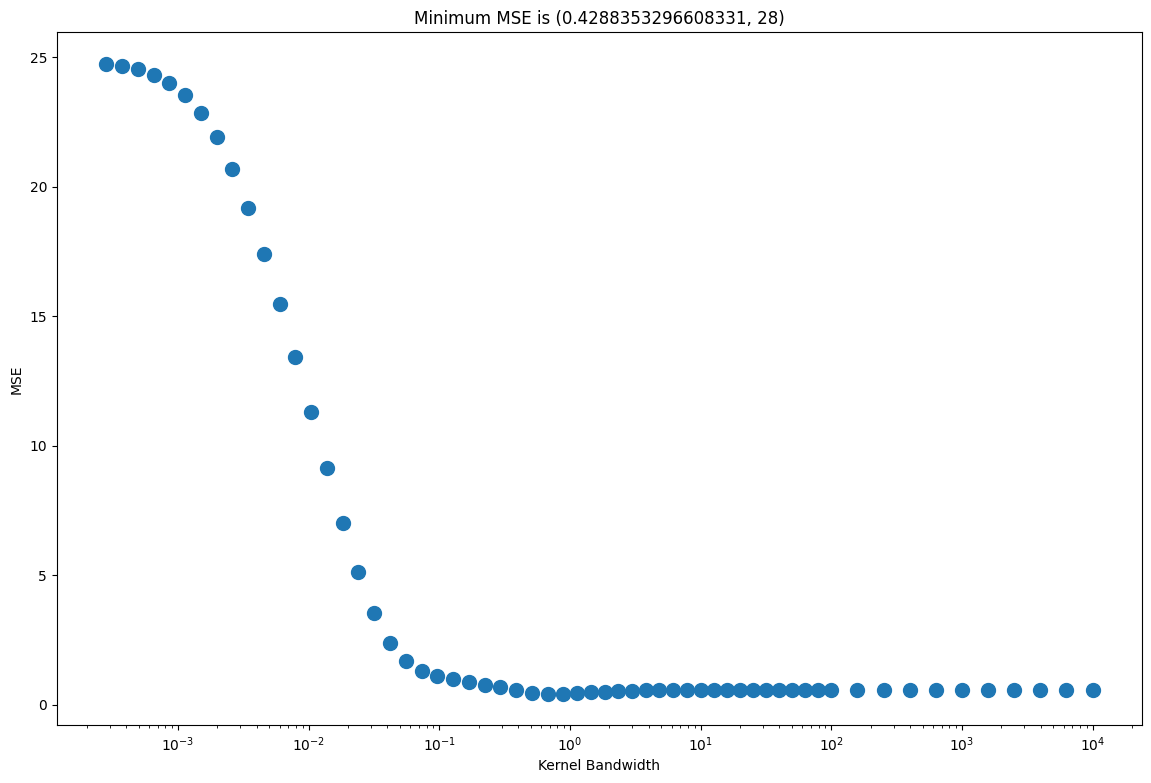

In [4]:
config = get_config()
true_files, local_files, bws, mses = get_drift_files_nonfull(config=config, root_dir=root_dir)
fig, ax = plt.subplots(figsize=(14,9))
mses.plot(kind="scatter", x="bw", y="mse", ax=ax, s=100)
ax.set_xscale("log")
ax.set_ylabel("MSE")
ax.set_xlabel("Kernel Bandwidth")
ax.set_title(f"Minimum MSE is {mses.iloc[np.argmin(mses.mse), 1], np.argmin(mses.mse)}")